In [1]:
using CSV, Plots, Random, LinearAlgebra, Statistics, DataFrames, ARFIMA, SparseArrays
include("proxgrad.jl")

proxgrad_const

In [2]:
sentiment = CSV.read("sentiment4.csv")

,Total_Sentiment,Avg_Sentiment,Vaccine,Death,Shut,Spread,Date,Death_Count_Day
,Float64,Float64,Int64,Int64,Int64,Int64,String,Int64
1,1.1162,0.0858615,0,0,0,0,02/11/20,0
2,-1.3723,-0.0980214,2,3,1,1,02/12/20,0
3,-1.3975,-0.0931667,0,3,0,0,02/13/20,0
4,0.0919,0.00919,0,1,2,1,02/14/20,0
5,0.0,0.0,1,0,0,0,02/15/20,0
6,-1.3986,-0.1998,0,0,1,0,02/16/20,0
7,-1.5258,-0.190725,1,0,0,0,02/17/20,0
8,-0.5147,-0.0343133,0,2,0,1,02/18/20,0
9,-1.1541,-0.144262,0,0,0,1,02/19/20,0


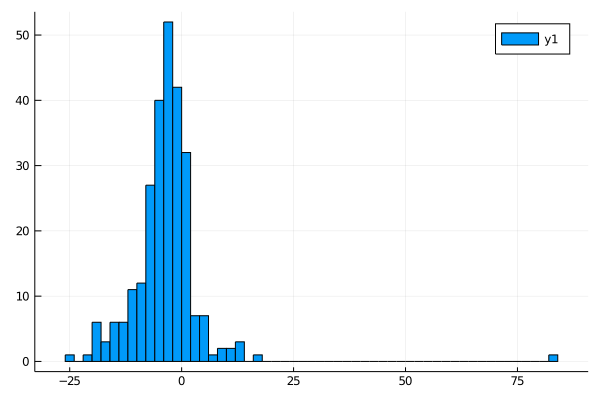

In [3]:
histogram(sentiment.Total_Sentiment)

In [7]:
tot = 0
for i in 1:263
    if sentiment.Total_Sentiment[i] <0
        tot = tot + 1
    end
end
tot

207

In [45]:
sent = []
de = []
sh = []
spr = []
dat = []
v = []
for i in 1:10
    idx = rand(1:263,1)
    append!(de,sentiment.Death[idx])
    append!(dat,sentiment.Date[idx])
    append!(sent,sentiment.Total_Sentiment[idx])
    append!(sh,sentiment.Shut[idx])
    append!(spr,sentiment.Spread[idx])
    append!(v,sentiment.Vaccine[idx])
end
x = [v de sh spr]

10×4 Array{Int64,2}:
  5  11   0  6
  0   1   2  1
 11   4   3  1
  3  16   5  3
  1   3   3  4
  2  10   4  7
  1  11  11  6
 11   4   3  1
  3   5  10  5
 12   5   5  7

In [16]:
using StatsPlots

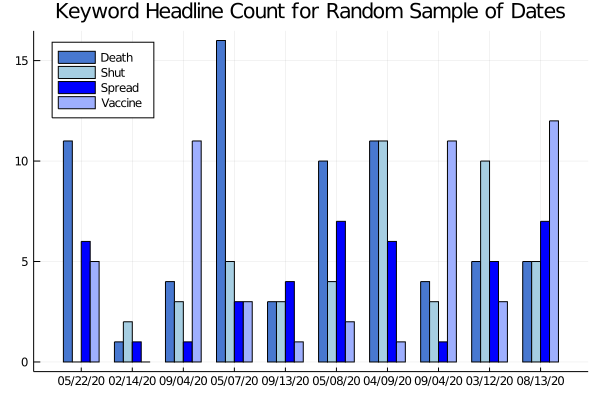

In [52]:
ctg = repeat(["Vaccine","Death","Shut","Spread"], inner = 10)
groupedbar(x, bar_position = :dodge, xticks=(1:10, dat), bar_width=0.7, group = ctg,  legend = :topleft, color = [:seaborn_muted :Paired_3 :blue :berlin])
title!("Keyword Headline Count for Random Sample of Dates")

In [154]:

x = [(sentiment.Vaccine[1:20]) (sentiment.Death[1:20]) (sentiment.Shut[1:20]) (sentiment.Spread[1:20])]
x1 = [sum(sentiment.Vaccine); sum(sentiment.Death); sum(sentiment.Shut); sum(sentiment.Spread)]

4-element Array{Int64,1}:
  933
 1679
  945
  745

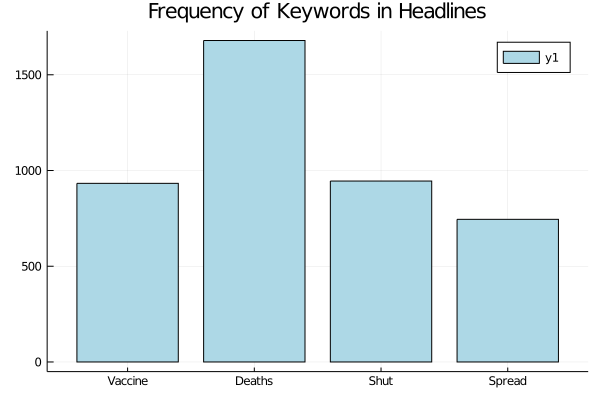

In [158]:
bar(["Vaccine","Deaths","Shut","Spread"],x1, c = :blues)
title!("Frequency of Keywords in Headlines")

In [30]:
sentiment = [sentiment[1:6] sentiment[8:9]]

,Total_Sentiment,Avg_Sentiment,Vaccine,Death,Shut,Spread,Death_Count_Day
,Float64,Float64,Int64,Int64,Int64,Int64,Int64
1,1.1162,0.0858615,0,0,0,0,0
2,-1.3723,-0.0980214,2,3,1,1,0
3,-1.3975,-0.0931667,0,3,0,0,0
4,0.0919,0.00919,0,1,2,1,0
5,0.0,0.0,1,0,0,0,0
6,-1.3986,-0.1998,0,0,1,0,0
7,-1.5258,-0.190725,1,0,0,0,0
8,-0.5147,-0.0343133,0,2,0,1,0
9,-1.1541,-0.144262,0,0,0,1,0


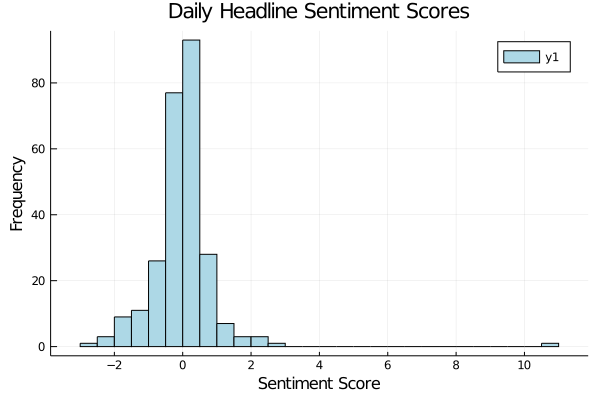

In [108]:
histogram(sentiment.Total_Sentiment, c = :blues)
xlabel!("Sentiment Score")
ylabel!("Frequency")
title!("Daily Headline Sentiment Scores")

In [31]:
function standarize(stock)
    return (stock .- mean(stock))/sqrt(var(stock))
end

standarize (generic function with 1 method)